In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
#Getting column names Measurment
 Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [32]:
#printing column names Station
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [14]:
# Find the most recent date in the measurment data set.
MRD = session.query(func.max(Measurement.date)).first()
MRD

('2017-08-23')

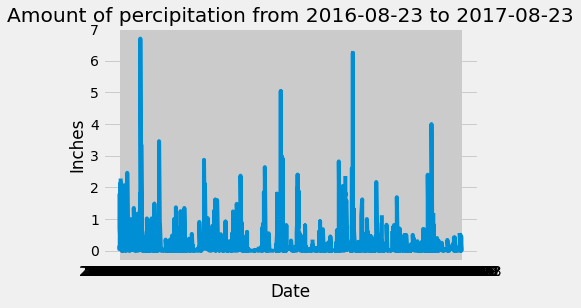

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

p_year = dt.date(2017,8,23)- dt.timedelta(days=365)
#Displya value
    #p_year

# Perform a query to retrieve the data and precipitation scores
date_percipation = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= p_year).order_by(Measurement.date)
#Displya value
#date_percipation

# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(date_percipation, columns=['Date','Percipitation'])

#another way to rename columns
    #percipitation_df = percipitation_df.rename(columns={"prcp":"Percipitation"})

#Display new column names in df
climate_df

# Sort the dataframe by date
# percipitation_df.sort_values(by = "Date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(climate_df.Date, climate_df.Percipitation, label='Percipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Amount of percipitation from 2016-08-23 to 2017-08-23")

plt.show()


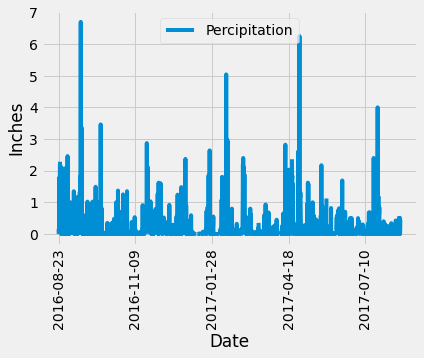

In [95]:
climate_df.plot("Date", "Percipitation", label='Percipitation', ylabel = "Inches" )
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()